# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(f"Data shape before train/test split {data.shape, target.shape}")

np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(f"After {X_train.shape, y_train.shape, X_test.shape, y_test.shape}")

Data shape before train/test split ((846, 19), (846,))
After ((549, 19), (549,), (297, 19), (297,))


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)


X_train_pd.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
1,226,107,54,98,210,66,11,218,31,24,169,221,704,216,71,14,0,188,197
2,31,88,42,77,151,58,8,140,47,18,142,165,293,158,64,10,11,198,205
3,361,101,46,105,195,61,10,198,34,23,150,213,578,195,66,7,38,192,205
4,372,97,47,87,164,64,9,156,43,20,149,173,359,182,68,1,13,192,202
5,495,94,45,72,179,69,6,156,41,19,144,181,373,191,69,5,5,193,198
6,285,89,48,85,189,64,8,169,39,20,153,188,427,190,64,16,5,195,201


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.792350,93.828780,44.941712,82.147541,168.945355,61.539162,8.393443,169.249545,40.872495,20.612022,148.224044,188.75592,442.499089,175.429872,72.342441,6.156648,12.453552,189.016393,195.734062
std,242.739551,8.206494,6.249107,15.949684,33.073419,7.062082,3.910265,33.758611,7.857893,2.628577,14.489705,31.80751,180.392563,33.505489,7.444885,4.811886,9.019046,6.198194,7.601764
min,1.000000,76.000000,33.000000,40.000000,110.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.00000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,215.000000,88.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.00000,318.000000,150.000000,67.000000,2.000000,5.000000,185.000000,190.000000
50%,416.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,177.00000,363.000000,174.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,635.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,161.000000,217.00000,600.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,306.000000,126.000000,52.000000,265.000000,61.000000,29.000000,186.000000,288.00000,1018.000000,268.000000,127.000000,22.000000,40.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

<Axes: >

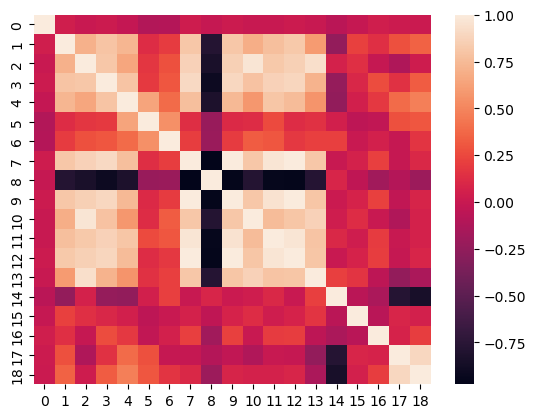

In [6]:
import seaborn as sns

corr = X_train_pd.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Вывод :
    Видим большое количество зависимых признаков. 

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

#### Избавимся от категориальных таргетов

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.fit_transform(y_test)

#### Проверим сбалансированность выборок для гарантии честной проверки

<Axes: ylabel='Count'>

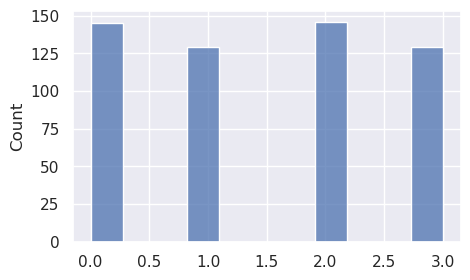

In [8]:
sns.set(rc={'figure.figsize':(5,3)})
sns.histplot(y_train)

<Axes: ylabel='Count'>

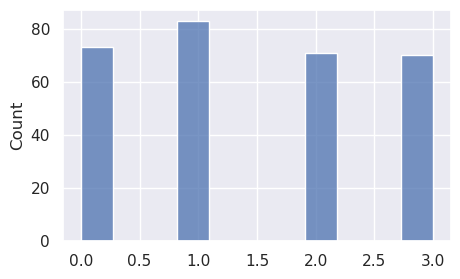

In [9]:
sns.histplot(y_test)

#### Подберём модель

In [10]:
from sklearn.linear_model import LogisticRegression
import scikitplot

model = LogisticRegression(penalty='l2',multi_class='multinomial',solver='saga',tol=1e-3,max_iter=500)
model.fit(X_train , y_train)
pred  = model.predict(X_test)
predicted_proba = model.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

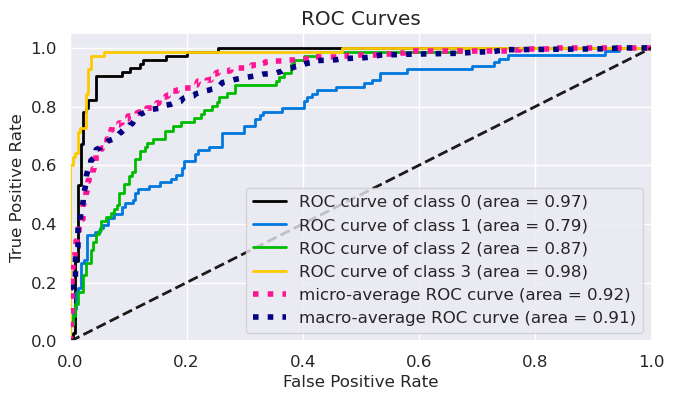

In [11]:
sns.set(rc={'figure.figsize':(7.5,4)})
scikitplot.metrics.plot_roc(y_test, predicted_proba)

In [12]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [13]:
print(f"Ballanced accuracy : {balanced_accuracy_score(pred,y_test)}")
print(f"F1 scoree : {f1_score(pred,y_test,average='micro')}")

Ballanced accuracy : 0.7474469722139647
F1 scoree : 0.7508417508417508


### Модель показывает не самую лучшую точноть , попробуем поменять гиперпараметры

In [14]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [15]:
parameters = {'penalty':['l1', 'l2'] ,'solver' : ['newton-cg', 'sag', 'saga'],
                 'max_iter':[350,500],'multi_class':['multinomial']}
model = LogisticRegression()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [350, 500], 'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'sag', 'saga']})

In [16]:
clf.best_params_

{'max_iter': 500,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [17]:
best_model = clf.best_estimator_
best_model.fit(X_train,y_train)

best_prediction = best_model.predict(X_test)
best_proba_prediction = best_model.predict_proba(X_test)

print(f"Ballanced accuracy : {balanced_accuracy_score(best_prediction,y_test)}")
print(f"F1 scoree : {f1_score(best_prediction,y_test,average='micro')}")

Ballanced accuracy : 0.8144651580954552
F1 scoree : 0.8047138047138047


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

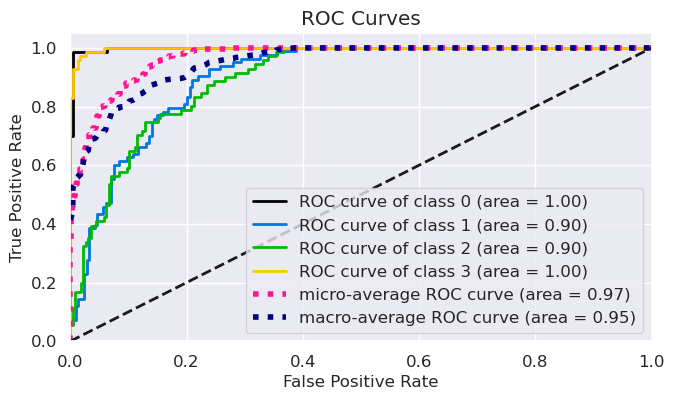

In [18]:
sns.set(rc={'figure.figsize':(7.5,4)})
scikitplot.metrics.plot_roc(y_test, best_proba_prediction)

### Вывод :
    С помощью GridSearchCV удалось найти наилучшие параметры модели :
        {'max_iter': 500,'multi_class': 'multinomial','penalty': 'l2','solver': 'newton-cg'}
    С ними модель показывает наилучшие результаты на кросс-валидации .
    На test выборке результат accuracy = 0.81 , f1 = 0.8
    Мне удалось поднять точность примерно на 5 процентов, что является нелохим результатом 
    с точки зрения acceuracy gain, однако по прежнему точность в 0.8 это далеко не лучший результат,
    которого можно достичь.
    Ниже попробуем примернить PCA и посмотрим как изменилось качество модели.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

### Используем PCA для отсеивания только тех признаков,которые лучше всего объясняют диперсию в данных . 

In [19]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
print(pca.singular_values_)

[5684.13824533 4468.91584731  575.86649969  474.75626413  267.14491482
  200.12140965  160.76689896  144.22941973  118.99719034  111.80112713
   80.59467393   70.09477887   58.61641096   48.24343446   37.23147521
   28.06819381   19.93424956   11.12101902    6.32212095]


Text(0.5, 1.0, 'Значения сингулярных чисел')

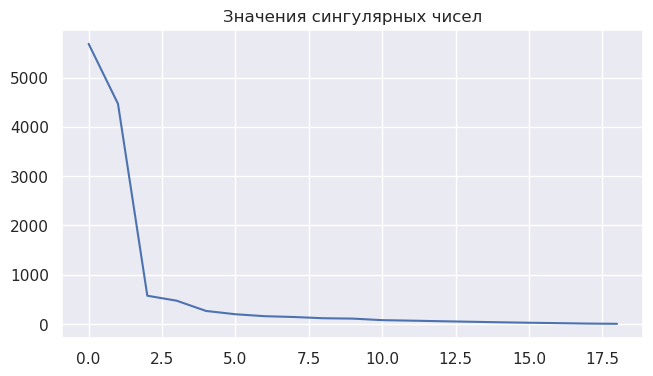

In [20]:
import matplotlib.pyplot as plt
plt.plot(pca.singular_values_)
plt.title("Значения сингулярных чисел")

In [21]:
pca.explained_variance_ratio_

array([6.09125894e-01, 3.76514886e-01, 6.25203539e-03, 4.24931773e-03,
       1.34546257e-03, 7.55031211e-04, 4.87271564e-04, 3.92180062e-04,
       2.66963085e-04, 2.35651475e-04, 1.22458936e-04, 9.26294612e-05,
       6.47763160e-05, 4.38787486e-05, 2.61335427e-05, 1.48527452e-05,
       7.49165173e-06, 2.33166936e-06, 7.53534946e-07])

#### Как можно заметить, наиболее выжными признаками являются первые два, однако я принял решение отобрать все 19, так как они дают наилучший результат, а необходимости снижать размерность в угоду скорости вычисления у нас нет

In [22]:
pca = PCA(n_components = 19)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

##### Снова натренируем модель на новых данных

In [23]:
warnings.filterwarnings('ignore')
parameters = {'penalty':['l1', 'l2'] ,'solver' : ['liblinear','newton-cg', 'newton-cholesky', 'sag', 'saga'],
                 'max_iter':[350,500],'multi_class':['multinomial']}
model = LogisticRegression()
clf_pca = GridSearchCV(model, parameters)
clf_pca.fit(X_pca_train, y_train)
clf_pca.best_estimator_

LogisticRegression(max_iter=350, multi_class='multinomial', solver='newton-cg')

In [24]:
best_pca_model = clf_pca.best_estimator_
best_pca_model.fit(X_pca_train, y_train)

best_pca_prediction = best_pca_model.predict(X_pca_test)
best_pca_proba_prediction = best_pca_model.predict_proba(X_pca_test)

print(f"Ballanced accuracy : {balanced_accuracy_score(best_pca_prediction,y_test)}")
print(f"F1 scoree : {f1_score(best_pca_prediction,y_test,average='micro')}")

Ballanced accuracy : 0.8155888731869124
F1 scoree : 0.8080808080808081


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

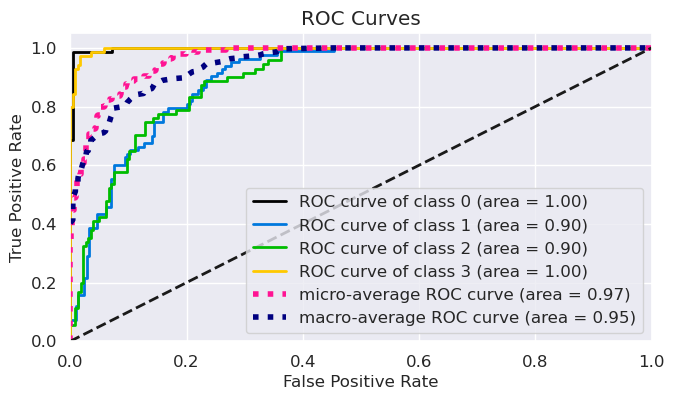

In [25]:
sns.set(rc={'figure.figsize':(7.5,4)})
scikitplot.metrics.plot_roc(y_test, best_pca_proba_prediction)

    Результат примерно такой-же, попробуем нормализовать даные и снова применить PCA

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_norm_train = scaler.transform(X_train)
X_norm_test = scaler.transform(X_test)

In [27]:
pca = PCA().fit(X_norm_train)
print(pca.singular_values_)

[72.27879283 41.32831452 30.50301961 25.74654698 22.94269591 21.9464963
 18.17796401 14.56403512 10.7673917   9.30612562  6.91583275  5.66420311
  4.87384501  4.2695676   3.37511112  2.92216957  2.66032711  1.80013635
  0.42149482]


In [28]:
pca = PCA(n_components = 19)
X_norm_pca_train = pca.fit_transform(X_norm_train)
X_norm_pca_test = pca.transform(X_norm_test)

##### Снова подберём модель на новых данных

In [29]:
parameters = {'penalty':['l1', 'l2'] ,'solver' : ['liblinear','newton-cg'],
                 'max_iter':[100,350,500],'multi_class':['multinomial']}
model = LogisticRegression()
clf_norm_pca = GridSearchCV(model, parameters, n_jobs=-1)
clf_norm_pca.fit(X_norm_pca_train, y_train)
clf_norm_pca.best_estimator_

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [30]:
best_norm_pca_model = clf_norm_pca.best_estimator_
best_norm_pca_model.fit(X_norm_pca_train, y_train)

best_norm_pca_prediction = best_norm_pca_model.predict(X_norm_pca_test)
best_norm_pca_proba_prediction = best_norm_pca_model.predict_proba(X_norm_pca_test)

print(f"Ballanced accuracy : {balanced_accuracy_score(best_norm_pca_prediction,y_test)}")
print(f"F1 scoree : {f1_score(best_norm_pca_prediction,y_test,average='micro')}")

Ballanced accuracy : 0.7966126460102364
F1 scoree : 0.7946127946127947


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

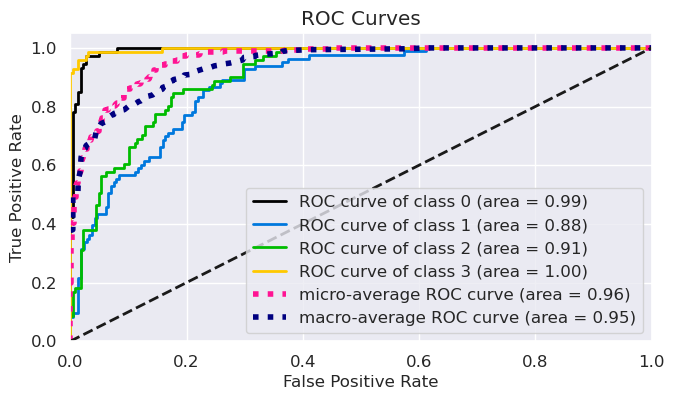

In [31]:
sns.set(rc={'figure.figsize':(7.5,4)})
scikitplot.metrics.plot_roc(y_test, best_norm_pca_proba_prediction)

### Теперь попробуем сначала сделать PCA, а затем нормализовать

In [32]:
pca = PCA(n_components = 19)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [33]:
scaler = StandardScaler().fit(X_pca_train)
X_pca_norm_train = scaler.transform(X_pca_train)
X_pca_norm_test = scaler.transform(X_pca_test)

In [34]:
parameters = {'penalty':['l1', 'l2'] ,'solver' : ['liblinear','newton-cg', 'newton-cholesky'],
                 'max_iter':[100,350,500],'multi_class':['multinomial']}
model = LogisticRegression()
clf_norm_pca = GridSearchCV(model, parameters, n_jobs=-1)
clf_norm_pca.fit(X_norm_pca_train, y_train)
clf_norm_pca.best_estimator_

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [35]:
best_norm_pca_model = clf_norm_pca.best_estimator_
best_norm_pca_model.fit(X_norm_pca_train, y_train)

best_norm_pca_prediction = best_norm_pca_model.predict(X_norm_pca_test)
best_norm_pca_proba_prediction = best_norm_pca_model.predict_proba(X_norm_pca_test)

print(f"Ballanced accuracy : {balanced_accuracy_score(best_norm_pca_prediction,y_test)}")
print(f"F1 scoree : {f1_score(best_norm_pca_prediction,y_test,average='micro')}")

Ballanced accuracy : 0.7966126460102364
F1 scoree : 0.7946127946127947


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

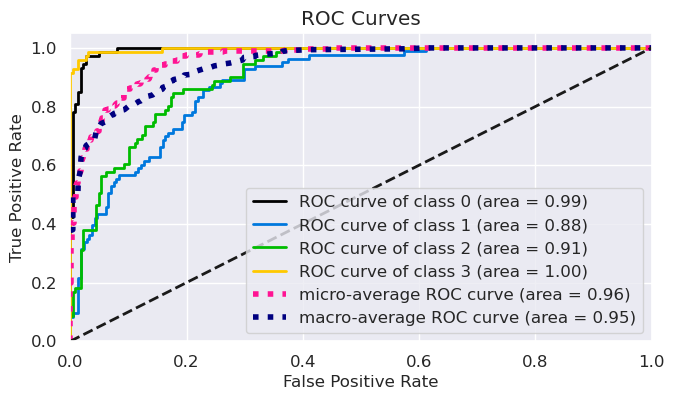

In [36]:
sns.set(rc={'figure.figsize':(7.5,4)})
scikitplot.metrics.plot_roc(y_test, best_norm_pca_proba_prediction)

# Вывод:
    Связка PCA+StandartScaller не показала особой эффективности, по прежнему лидирует вариант с PCA 
    без иных манипуляций

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [37]:
np.random.seed(1)
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[4,5,6,9,11]}
model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [38]:
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)

best_prediction = best_model.predict(X_test)
best_proba_prediction = best_model.predict_proba(X_test)

print(f"Ballanced accuracy : {balanced_accuracy_score(best_prediction,y_test)}")
print(f"F1 scoree : {f1_score(best_prediction,y_test,average='micro')}")

Ballanced accuracy : 0.6671861565929362
F1 scoree : 0.6397306397306397


# Вывод:
    Одному дереву не удалось показать хорошую предсказательную способность, однако мы настраивали только один
    параметр "max_depth",поэтому не стоит удивляться такому результату, этого недостаточно.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [39]:
from sklearn.ensemble import BaggingClassifier

Text(0.5, 1.0, 'Оценка качества ансамблей')

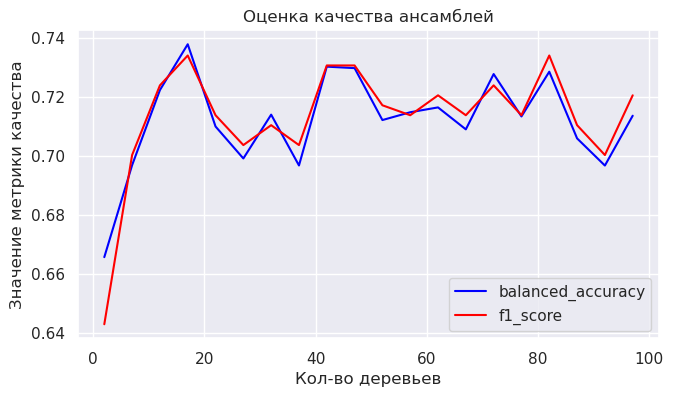

In [40]:
np.random.seed(1)
N = np.arange(2,100,5)
params = {}
for n in N:
    metricks = []
    clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n,
                        max_samples=X_train.shape[0], max_features=X_train.shape[1], n_jobs=-1)
    model = clf.fit(X_train, y_train)
    bagging_prediction = model.predict(X_test)
    bagging_proba_prediction = model.predict_proba(X_test)
    #metricks.append(accuracy_score(bagging_prediction,y_test))
    metricks.append(balanced_accuracy_score(bagging_prediction,y_test))
    metricks.append(f1_score(bagging_prediction,y_test,average='micro'))
    params[str(n)] = metricks

results_df = pd.DataFrame(params).to_numpy() 
#plt.plot(N,results_df[0], color='Green')
plt.plot(N,results_df[0], color='Blue')
plt.plot(N,results_df[1], color='Red')
plt.legend(["balanced_accuracy","f1_score"])
plt.xlabel('Кол-во деревьев')
plt.ylabel('Значение метрики качества')
plt.title('Оценка качества ансамблей')


In [41]:
pd.DataFrame(params)

,2,7,12,17,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97
0,0.665796,0.696907,0.722314,0.737814,0.709994,0.699177,0.714000,0.696810,0.730237,0.729737,0.712171,0.714814,0.716450,0.709021,0.727730,0.713399,0.728527,0.705971,0.696780,0.713638
1,0.643098,0.700337,0.723906,0.734007,0.713805,0.703704,0.710438,0.703704,0.730640,0.730640,0.717172,0.713805,0.720539,0.713805,0.723906,0.713805,0.734007,0.710438,0.700337,0.720539


## Вывод:
    Оптималным кол-вом деревьев в ансамбле является 17. Точность по прежнему неуодовлетворительная

## Сделаем аналогичные действия с логистической регрессией

Text(0.5, 1.0, 'Оценка качества ансамблей')

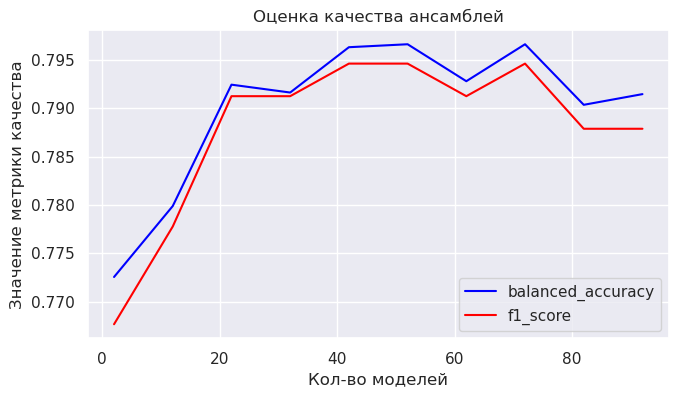

In [42]:
scaler = StandardScaler().fit(X_train)
X_norm_train = scaler.transform(X_train)
X_norm_test = scaler.transform(X_test)

np.random.seed(1)
N = np.arange(2,100,10)
params = {}
for n in N:
    metricks = []
    clf = BaggingClassifier(estimator=LogisticRegression(max_iter= 500,
                             multi_class='multinomial',
                             penalty= 'l2',solver='newton-cg'), n_estimators=n,
                            max_samples=X_train.shape[0], max_features=X_train.shape[1], n_jobs=-1)
    model = clf.fit(X_norm_train, y_train)
    bagging_prediction = model.predict(X_norm_test)
    bagging_proba_prediction = model.predict_proba(X_norm_test)
    #metricks.append(accuracy_score(bagging_prediction,y_test))
    metricks.append(balanced_accuracy_score(bagging_prediction,y_test))
    metricks.append(f1_score(bagging_prediction,y_test,average='micro'))
    params[str(n)] = metricks

results_df = pd.DataFrame(params).to_numpy() 
#plt.plot(N,results_df[0], color='Green')
plt.plot(N,results_df[0], color='Blue')
plt.plot(N,results_df[1], color='Red')
plt.legend(["balanced_accuracy","f1_score"])
plt.xlabel('Кол-во моделей')
plt.ylabel('Значение метрики качества')
plt.title('Оценка качества ансамблей')

In [43]:
pd.DataFrame(params)

,2,12,22,32,42,52,62,72,82,92
0,0.772561,0.779893,0.792436,0.791623,0.796307,0.796613,0.792793,0.796613,0.790353,0.791458
1,0.767677,0.777778,0.791246,0.791246,0.794613,0.794613,0.791246,0.794613,0.787879,0.787879


# Вывод:
    Наилучшие результаты были достигнуты при 42 моделях в ансамбле. Параметры используемые в модели были взяты 
    из предыдущих попыток найти лучшию регрессию.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Text(0.5, 1.0, 'Оценка качества ансамблей')

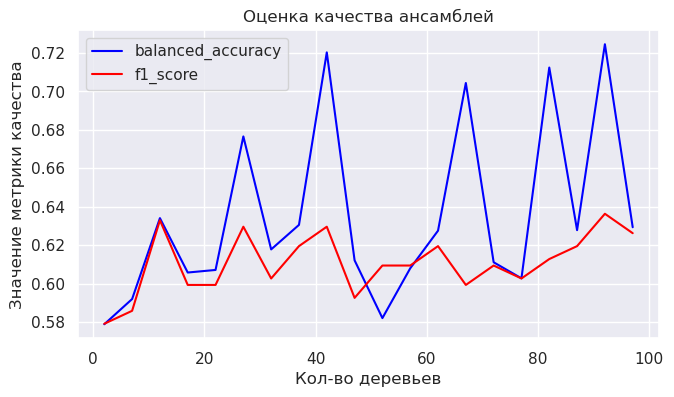

In [44]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1)
N = np.arange(2,100,5)
params = {}
for n in N:
    metricks = []
    clf = RandomForestClassifier(n_estimators= n,
                                 min_samples_split=2,
                                 min_samples_leaf= 2,
                                 max_depth= 2,
                                 bootstrap= True, n_jobs=-1)
    model = clf.fit(X_train, y_train)
    rf_prediction = model.predict(X_test)
    rf_proba_prediction = model.predict_proba(X_test)
    #metricks.append(accuracy_score(rf_prediction,y_test))
    metricks.append(balanced_accuracy_score(rf_prediction,y_test))
    metricks.append(f1_score(rf_prediction,y_test,average='micro'))
    params[str(n)] = metricks

results_df = pd.DataFrame(params).to_numpy() 
#plt.plot(N,results_df[0], color='Green')
plt.plot(N,results_df[0], color='Blue')
plt.plot(N,results_df[1], color='Red')
plt.legend(["balanced_accuracy","f1_score"])
plt.xlabel('Кол-во деревьев')
plt.ylabel('Значение метрики качества')
plt.title('Оценка качества ансамблей')

In [45]:
pd.DataFrame(params)

,2,7,12,17,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97
0,0.578866,0.591984,0.634091,0.605789,0.607123,0.676614,0.617822,0.630578,0.720353,0.612123,0.582069,0.607973,0.627573,0.704432,0.611125,0.602765,0.712458,0.627843,0.724590,0.629361
1,0.579125,0.585859,0.632997,0.599327,0.599327,0.629630,0.602694,0.619529,0.629630,0.592593,0.609428,0.609428,0.619529,0.599327,0.609428,0.602694,0.612795,0.619529,0.636364,0.626263


# Вывод:
    Оптимальным количеством деревьев является 42 штуки с глубиной 2

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

Text(0.5, 1.0, 'Оценка качества модели на разных размерах датасета')

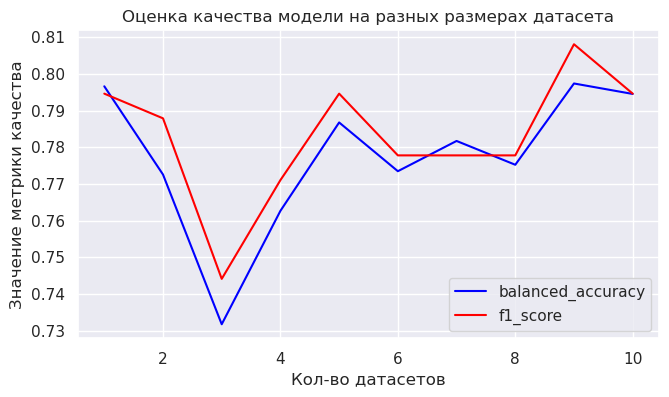

In [46]:
np.random.seed(1)
step = 84
param_dict = {}

for i in range(10):
    num_of_datasets = i+1
    metricks = []
    df = dataset[0 : 84+step*(i)]
    data = dataset[:, :-1].astype(int)
    target = dataset[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
    
    scaler = StandardScaler().fit(X_train)
    X_norm_train = scaler.transform(X_train)
    X_norm_test = scaler.transform(X_test)
    
    parameters = {'penalty':['l1', 'l2'] ,'solver' : ['liblinear','newton-cg','lbfgs'],
                 'max_iter':[500,700,900],'multi_class':['multinomial']}
    model = LogisticRegression()
    clf = GridSearchCV(model, parameters, n_jobs=-1)
    clf.fit(X_norm_train, y_train)
    
    best_model = clf.best_estimator_
    best_model.fit(X_norm_train,y_train)
    best_prediction = best_model.predict(X_norm_test)
    best_proba_prediction = best_model.predict_proba(X_norm_test)
    
    #metricks.append(accuracy_score(best_prediction,y_test))
    metricks.append(balanced_accuracy_score(best_prediction,y_test))
    metricks.append(f1_score(best_prediction,y_test,average='micro'))
    param_dict[str(num_of_datasets)] = metricks

datasets_shape =  np.arange(1, 11,1)
results_df = pd.DataFrame(param_dict).to_numpy() 
#plt.plot(datasets_shape,results_df[0], color='Green')
plt.plot(datasets_shape,results_df[0], color='Blue')
plt.plot(datasets_shape,results_df[1], color='Red')
plt.legend(["balanced_accuracy","f1_score"])
plt.xlabel('Кол-во датасетов')
plt.ylabel('Значение метрики качества')
plt.title('Оценка качества модели на разных размерах датасета') 

# Вывод:
    Наилучшую модель удалось натренировать на датасете, состоящем из 90% от исходного.
    Как можно заметить по этому примеру, при использовании логистической регрессии не всегда работает 
    "больше данных->лучше модель". Что неудивительно, ведь данные бывают разные и порой добавление новых
    точек может только усугубить ситуацию, так как гиперплоскости станет сложнее их качественно разделять.

Text(0.5, 1.0, 'Оценка качества модели на разных размерах датасета')

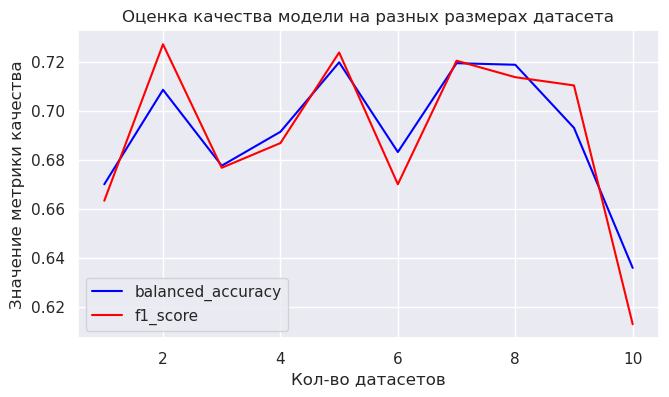

In [47]:
np.random.seed(1)
step = 84
param_dict = {}

for i in range(10):
    num_of_datasets = i+1
    metricks = []
    df = dataset[0 : 84+step*(i)]
    data = dataset[:, :-1].astype(int)
    target = dataset[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
    
    parameters = {'max_depth':[3,6,10,14], 'criterion':['gini', 'entropy'],
              'min_samples_split': [2,5,7,9,13],
              'min_samples_leaf': [2,5,7,9,13]}
    model = DecisionTreeClassifier()
    clf = GridSearchCV(model, parameters, n_jobs=-1)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    best_model.fit(X_train, y_train)
    best_prediction = best_model.predict(X_test)
    best_proba_prediction = best_model.predict_proba(X_test)
    
    #metricks.append(accuracy_score(best_prediction,y_test))
    metricks.append(balanced_accuracy_score(best_prediction,y_test))
    metricks.append(f1_score(best_prediction,y_test,average='micro'))
    param_dict[str(num_of_datasets)] = metricks

datasets_shape =  np.arange(1, 11,1)
results_df = pd.DataFrame(param_dict).to_numpy() 
#plt.plot(datasets_shape,results_df[0], color='Green')
plt.plot(datasets_shape,results_df[0], color='Blue')
plt.plot(datasets_shape,results_df[1], color='Red')
plt.legend(["balanced_accuracy","f1_score"])
plt.xlabel('Кол-во датасетов')
plt.ylabel('Значение метрики качества')
plt.title('Оценка качества модели на разных размерах датасета')     

# Вывод:
    Наилучшую модель удалось получить при объёме данных равных 80% от исходного датасета. 

Text(0.5, 1.0, 'Оценка качества модели на разных размерах датасета')

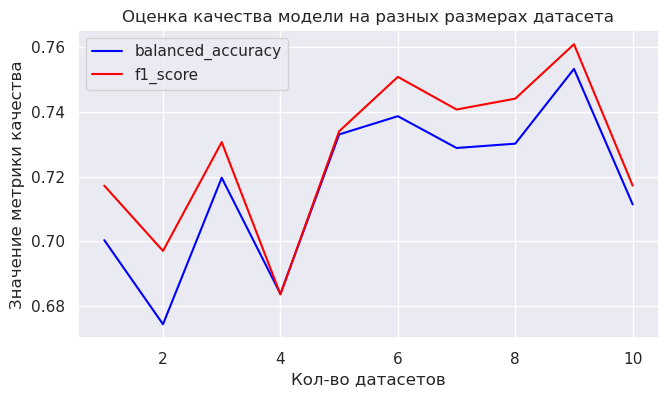

In [48]:
np.random.seed(1)
step = 84
param_dict = {}

for i in range(10):
    num_of_datasets = i+1
    metricks = []
    df = dataset[0 : 84+step*(i)]
    data = dataset[:, :-1].astype(int)
    target = dataset[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
    
    parameters = {'n_estimators':[5,10,15,20],
                  'criterion':['gini'],
                  'max_depth':[5,7,9,11], 
                  'min_samples_split': [7,8,9],
                  'min_samples_leaf': [4,7,13]}
    
    model = RandomForestClassifier()
    clf = GridSearchCV(model, parameters, n_jobs=-1)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    best_model.fit(X_train, y_train)
    best_prediction = best_model.predict(X_test)
    best_proba_prediction = best_model.predict_proba(X_test)
    
    #metricks.append(accuracy_score(best_prediction,y_test))
    metricks.append(balanced_accuracy_score(best_prediction,y_test))
    metricks.append(f1_score(best_prediction,y_test,average='micro'))
    param_dict[str(num_of_datasets)] = metricks

datasets_shape =  np.arange(1, 11,1)
results_df = pd.DataFrame(param_dict).to_numpy() 
#plt.plot(datasets_shape,results_df[0], color='Green')
plt.plot(datasets_shape,results_df[0], color='Blue')
plt.plot(datasets_shape,results_df[1], color='Red')
plt.legend(["balanced_accuracy","f1_score"])
plt.xlabel('Кол-во датасетов')
plt.ylabel('Значение метрики качества')
plt.title('Оценка качества модели на разных размерах датасета')   

# Вывод:
    Лучший результат получается на 9 датасетах